### **Assignment**

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('flight_price.xlsx')
df.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
df.shape


(10683, 11)

Rows = 10683
columns = 11

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


1. Average price is 9087
2. Minimum price is 1759
3. Maximum price is 79512

In [6]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df['day'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[0])


In [8]:
df['month'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[1])
df['year'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[2])


In [9]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [10]:
df.drop(columns='Date_of_Journey', index=1, inplace=True)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10681 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  object
 11  month            10682 non-null  object
 12  year             10682 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df['Source'].unique()


array(['Banglore', 'Delhi', 'Kolkata', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [14]:
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])


In [15]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897,24,03,2019
2,4,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,8,13882,9,06,2019
3,3,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,8,6218,12,05,2019
4,3,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,8,13302,01,03,2019
5,8,3,0,CCU → BLR,09:00,11:25,2h 25m,non-stop,8,3873,24,06,2019


In [16]:
df['Arrival_Time'].apply(lambda x: x.split(' ')[0])


0        01:10
2        04:25
3        23:30
4        21:35
5        11:25
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [17]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])


In [18]:
df['Arrvial_hour'] = df['Arrival_Time'].apply(lambda x: x.split(':')[0])
df['Arrvial_min'] = df['Arrival_Time'].apply(lambda x: x.split(':')[1])


In [19]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_min'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])


In [20]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min
0,3,0,5,BLR → DEL,22:20,01:10,2h 50m,non-stop,8,3897,24,03,2019,01,10,22,20
2,4,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,8,13882,9,06,2019,04,25,09,25
3,3,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,8,6218,12,05,2019,23,30,18,05
4,3,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,8,13302,01,03,2019,21,35,16,50
5,8,3,0,CCU → BLR,09:00,11:25,2h 25m,non-stop,8,3873,24,06,2019,11,25,09,00


In [21]:
df.drop(['Dep_Time', 'Arrival_Time', 'Route'], axis=1, inplace=True)


In [22]:
df.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min
0,3,0,5,2h 50m,non-stop,8,3897,24,03,2019,01,10,22,20
2,4,2,1,19h,2 stops,8,13882,9,06,2019,04,25,09,25
3,3,3,0,5h 25m,1 stop,8,6218,12,05,2019,23,30,18,05
4,3,0,5,4h 45m,1 stop,8,13302,01,03,2019,21,35,16,50
5,8,3,0,2h 25m,non-stop,8,3873,24,06,2019,11,25,09,00


In [23]:
df['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [24]:
df['Total_Stops'].value_counts()


1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
df['Total_Stops'] = df['Total_Stops'].map(
    {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, })


In [26]:
df['Total_Stops'].isnull().sum()


1

In [27]:
df['Total_Stops'].fillna(1, inplace=True)


In [28]:
df.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min
0,3,0,5,2h 50m,0.0,8,3897,24,03,2019,01,10,22,20
2,4,2,1,19h,2.0,8,13882,9,06,2019,04,25,09,25
3,3,3,0,5h 25m,1.0,8,6218,12,05,2019,23,30,18,05
4,3,0,5,4h 45m,1.0,8,13302,01,03,2019,21,35,16,50
5,8,3,0,2h 25m,0.0,8,3873,24,06,2019,11,25,09,00


In [29]:
df['Duration_hour'] = df['Duration'].apply(
    lambda x: x.split(' ')[0].split('h')[0])


In [30]:
df.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min,Duration_hour
0,3,0,5,2h 50m,0.0,8,3897,24,03,2019,01,10,22,20,2
2,4,2,1,19h,2.0,8,13882,9,06,2019,04,25,09,25,19
3,3,3,0,5h 25m,1.0,8,6218,12,05,2019,23,30,18,05,5
4,3,0,5,4h 45m,1.0,8,13302,01,03,2019,21,35,16,50,4
5,8,3,0,2h 25m,0.0,8,3873,24,06,2019,11,25,09,00,2


In [31]:
df['Duration_hour'].isnull().sum()


0

In [32]:
df[df['Duration_hour'] == '5m']


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min,Duration_hour
6474,1,4,3,5m,2.0,8,17327,6,03,2019,16,55,16,50,5m


In [33]:
df.drop([6474, 2660], axis=0, inplace=True)


In [49]:
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min,Duration_hour
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4
5,8,3,0,0,8,3873,24,6,2019,11,25,9,0,2


In [35]:
df.drop('Duration', axis=1, inplace=True)


In [48]:
df['Total_Stops'] = df['Total_Stops'].astype(int)


In [36]:
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Arrvial_hour,Arrvial_min,Dep_hour,Dep_min,Duration_hour
0,3,0,5,0.0,8,3897,24,03,2019,01,10,22,20,2
2,4,2,1,2.0,8,13882,9,06,2019,04,25,09,25,19
3,3,3,0,1.0,8,6218,12,05,2019,23,30,18,05,5
4,3,0,5,1.0,8,13302,01,03,2019,21,35,16,50,4
5,8,3,0,0.0,8,3873,24,06,2019,11,25,09,00,2


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10680 non-null  int32  
 1   Source           10680 non-null  int32  
 2   Destination      10680 non-null  int32  
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10680 non-null  int32  
 5   Price            10680 non-null  int64  
 6   day              10680 non-null  object 
 7   month            10680 non-null  object 
 8   year             10680 non-null  object 
 9   Arrvial_hour     10680 non-null  object 
 10  Arrvial_min      10680 non-null  object 
 11  Dep_hour         10680 non-null  object 
 12  Dep_min          10680 non-null  object 
 13  Duration_hour    10680 non-null  object 
dtypes: float64(1), int32(4), int64(1), object(8)
memory usage: 1.1+ MB


In [38]:
df['day'] = df['day'].astype(int)


In [39]:
obj = [feature for feature in df.columns if df[feature].dtype == 'O']


In [40]:
obj


['month',
 'year',
 'Arrvial_hour',
 'Arrvial_min',
 'Dep_hour',
 'Dep_min',
 'Duration_hour']

In [41]:
for feature in obj:
    df[feature] = df[feature].astype(int)


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10680 non-null  int32  
 1   Source           10680 non-null  int32  
 2   Destination      10680 non-null  int32  
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10680 non-null  int32  
 5   Price            10680 non-null  int64  
 6   day              10680 non-null  int32  
 7   month            10680 non-null  int32  
 8   year             10680 non-null  int32  
 9   Arrvial_hour     10680 non-null  int32  
 10  Arrvial_min      10680 non-null  int32  
 11  Dep_hour         10680 non-null  int32  
 12  Dep_min          10680 non-null  int32  
 13  Duration_hour    10680 non-null  int32  
dtypes: float64(1), int32(12), int64(1)
memory usage: 750.9 KB


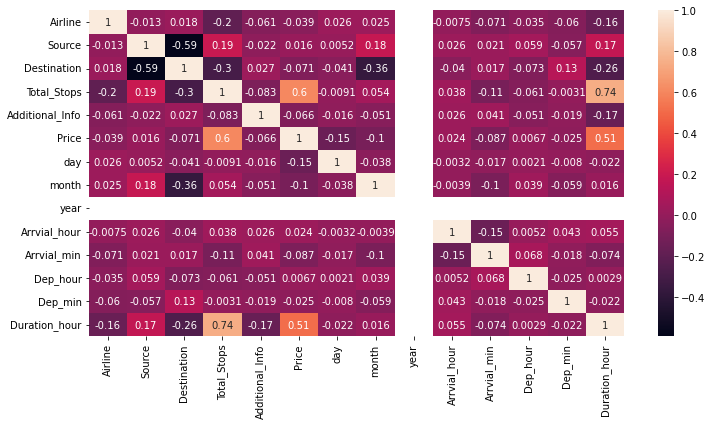

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [50]:
df['month'].unique()


array([3, 6, 5, 4])

<Figure size 864x432 with 0 Axes>

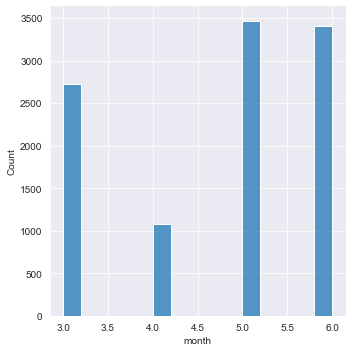

In [44]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.displot(x='month', data=df)
plt.show()


### **Observation**
- Maximum flight booked in 5th month

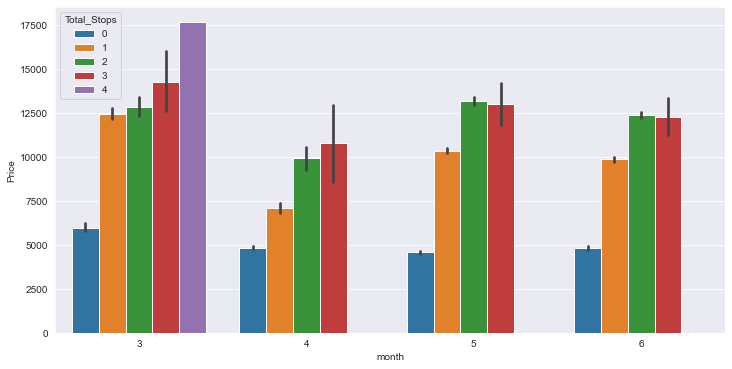

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Price', data=df, hue='Total_Stops')
plt.show()


### **Observation**
- Maximum price in 3rd month
- Total stops of maximum price flight is 4

In [47]:
df['year'].unique()


array([2019])

In [52]:
df['Additional_Info'].unique()


array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

<Figure size 864x432 with 0 Axes>

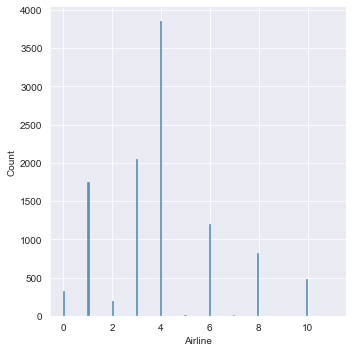

In [53]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.displot(x='Airline', data=df)
plt.show()


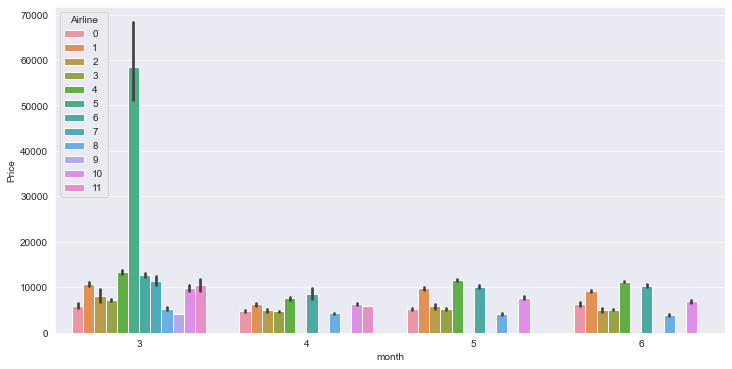

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Price', data=df, hue='Airline')
plt.show()
